# Dynamic Semantic Evolution

Hemos estudiado que los modelos de word embeddings mapearán las palabras de un corpus dado a vectores de valores continuos en un espacio vectorial de dimension a determinar.

También sabemos que dichos vectores se obtienen teniendo en cuenta el contexto de cada palabra en los documentos. Pero, ¿y si en lugar de extraer los vectores-palabra dado un corpus, lo hacemos con corpus compuestos por documentos escritos en diferentes momentos de la historia?

Esto nos permite ver cómo ha evolucionado (o no) el lenguaje.

### Proyecto HistWords
https://nlp.stanford.edu/projects/histwords/

<img src=https://empresas.blogthinkbig.com/wp-content/uploads/2019/06/embeddings_evolution_1.png width=750px>

<img src=https://empresas.blogthinkbig.com/wp-content/uploads/2019/06/embeddings_evolution_2.png width=750px>

## Import Libraries

In [2]:
import pandas as pd
import re
from nltk import sent_tokenize
from nltk.corpus import stopwords
import string
from tqdm import tqdm
from gensim.models import Word2Vec

In [3]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.style.use('ggplot')
import numpy as np

## Define Functions

In [26]:
def semantic_evolution(word, emb_list):
    word_clusters = []
    emb_clusters = []
    for emb in emb_list:
        word_list = []
        emb_list = []
        for sim_word, _ in emb.wv.most_similar(word):
            emb_list.append(emb.wv[sim_word])
            word_list.append(sim_word)
        word_list.insert(0, word)
        emb_list.insert(0, emb.wv[word])
        word_clusters.append(word_list)
        emb_clusters.append(emb_list)
    return word_clusters, np.array(emb_clusters)

def print_semantic_evolution(word_clusters):
    print("#"*50)
    print("Evolution of word {}".format(word_clusters[0][0]))
    for i, l in enumerate(word_clusters):
        print("Time period {}:".format(i+1))
        print(" | ".join(l[1:]))

In [48]:
def plot_tsne(title, labels, embedding_clusters, word_clusters, months):
    plt.figure(figsize=(16, 9))
    colors = ['red', 'black', 'blue']
    for label, similar_embeddings, words, color, month in zip(labels, embedding_clusters, word_clusters, colors, months):
        x = similar_embeddings[:, 0]
        y = similar_embeddings[:, 1]
        plt.scatter(x[0], y[0], s=100, c=color, marker='x', alpha=0.7, label=label + '-' + month)
        plt.scatter(x[1:], y[1:], c=color, alpha=0.7, label=label+month)
        for i, word in enumerate(words):
            if i == 0:
                plt.annotate(word, alpha=0.9, xy=(x[i], y[i]), xytext=(5, 2),
                             textcoords='offset points', ha='right', va='bottom', size=20, color=color)
            else:
                plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                             textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()

## Data Loading

In [5]:
df = pd.read_excel('../../datasets/spanish_news_corpus_temp.xlsx')
print(df.shape)
df.tail()

(31312, 6)


,date,title,text,keywords,media,url
31307,2019-10-23,Campofrío esquiva los aranceles de EEUU y la c...,La segunda mayor empresa de alimentación españ...,facturación|proteínas|esquiva|porcina|arancele...,expansion,https://www.expansion.com/empresas/distribucio...
31308,2019-10-23,"Capital Group aflora el 3,1% del capital de Ce...",La gestora de fondos estadounidense Capital Gr...,management|capital|través|euros|principal|comp...,expansion,https://www.expansion.com/mercados/2019/10/23/...
31309,2019-10-23,Se equivoca al rellenar la lotería y gana dos ...,Las personas que creen en el destino suelen pe...,vez|dólares|primer|ganador|dos|equivoca|número...,elconfidencial,https://www.elconfidencial.com/alma-corazon-vi...
31310,2019-10-23,"El Premio Nacional de Narrativa, por Milena Bu...",Leo con enorme alivio y regocijo las declaraci...,ser|vez|escritor|si|valor|solapa|prostitutas|b...,elperiodico,https://www.elperiodico.com/es/opinion/2019102...
31311,2019-10-24,¿Dónde ve oportunidades en los mercados? por V...,¿Dónde ve oportunidades en los mercados?\n\n¿S...,dónde|responderá|regístrese|ve|riesgos|puede|p...,expansion,https://www.expansion.com/encuentros/victor-de...


In [6]:
# Load Word2Vec models trained over increasing temporal windows
w2v_t1 = Word2Vec.load('../../data/w2v_cbow_d300_mc5_w5_temp_1.pkl')
w2v_t2 = Word2Vec.load('../../data/w2v_cbow_d300_mc5_w5_temp_2.pkl')
w2v_t3 = Word2Vec.load('../../data/w2v_cbow_d300_mc5_w5_temp.pkl')

## Analysis

In [17]:
word_clusters, emb_clusters = semantic_evolution('brexit', [w2v_t1, w2v_t2, w2v_t3])
print_semantic_evolution(word_clusters)
word_clusters, emb_clusters = semantic_evolution('elecciones', [w2v_t1, w2v_t2, w2v_t3])
print_semantic_evolution(word_clusters)
word_clusters, emb_clusters = semantic_evolution('procés', [w2v_t1, w2v_t2, w2v_t3])
print_semantic_evolution(word_clusters)

##################################################
Evolution of word brexit
Time period 1:
divorcio | salida | bruselas | premier | ue | parlamento | johnson | prórroga | bloquear | migratorio
Time period 2:
divorcio | backstop | laborismo | ue | salida | bruselas | johnson | boris | felguera | proteccionismo
Time period 3:
divorcio | johnson | salida | plebiscito | aplazamiento | backstop | ue | abrupto | bruselas | referéndum
##################################################
Evolution of word elecciones
Time period 1:
urnas | comicios | electoral | generales | primarias | 28-a | referéndum | convocatorias | cortes | repetición
Time period 2:
urnas | comicios | primarias | electoral | 10-n | eleciones | generales | legislativas | votaciones | convocatorias
Time period 3:
urnas | comicios | primarias | 10-n | votaciones | elecciones— | eleciones | electoral | generales | convocatorias
##################################################
Evolution of word procés
Time period 1:
1-o | inde

/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


## Ejemplo: 'Brexit'

In [27]:
word_clusters, emb_clusters = semantic_evolution('brexit', [w2v_t1, w2v_t2, w2v_t3])

/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [34]:
n, m, k = emb_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=2019)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(emb_clusters.reshape(n * m, k))).reshape(n, m, 2)


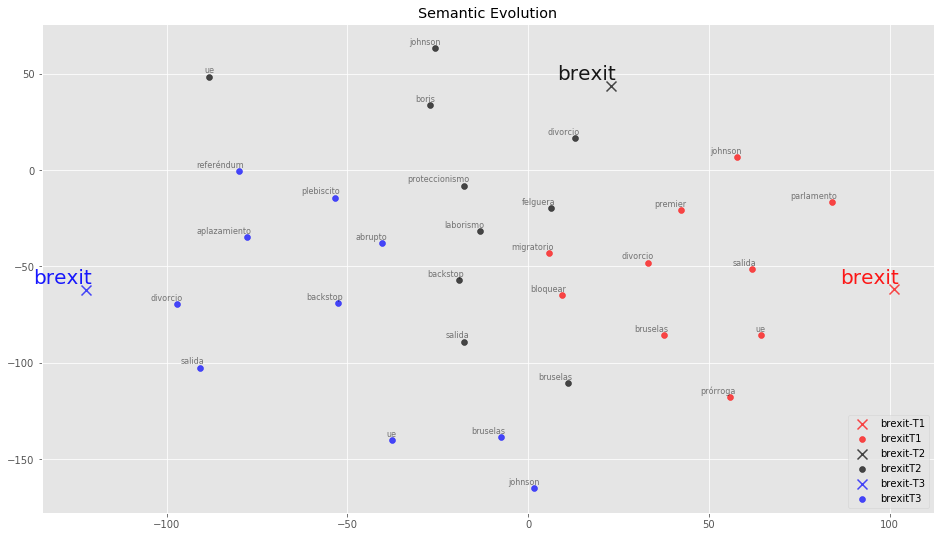

In [49]:
plot_tsne('Semantic Evolution', 3*['brexit'], embeddings_en_2d, word_clusters, ['T1', 'T2', 'T3'])

## Ejemplo: 'Elecciones'

In [60]:
word_clusters, emb_clusters = semantic_evolution('elecciones', [w2v_t1, w2v_t2, w2v_t3])

/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [67]:
n, m, k = emb_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=2019)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(emb_clusters.reshape(n * m, k))).reshape(n, m, 2)


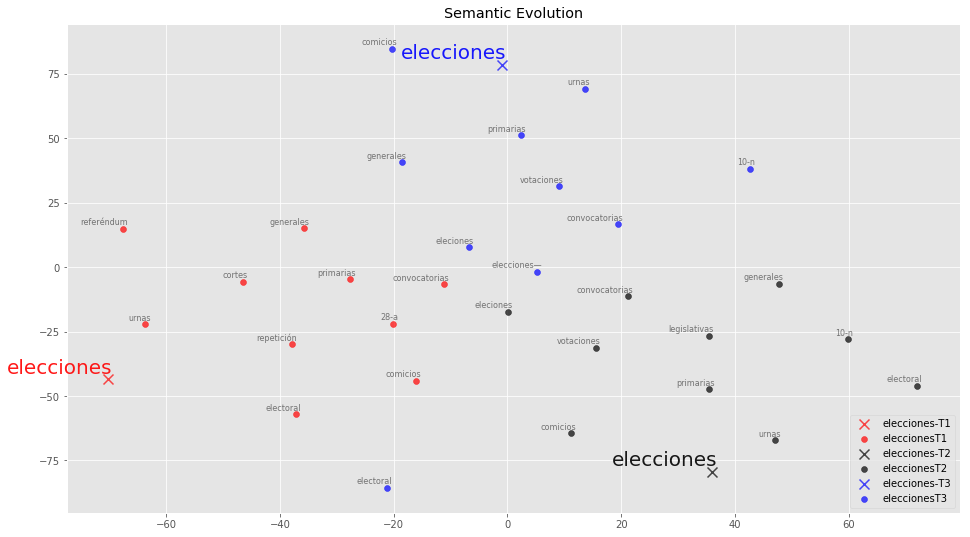

In [68]:
plot_tsne('Semantic Evolution', 3*['elecciones'], embeddings_en_2d, word_clusters, ['T1', 'T2', 'T3'])

## Ejemplo: 'Procés'

In [71]:
word_clusters, emb_clusters = semantic_evolution('procés', [w2v_t1, w2v_t2, w2v_t3])

/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/ipnb/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [72]:
n, m, k = emb_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=2019)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(emb_clusters.reshape(n * m, k))).reshape(n, m, 2)


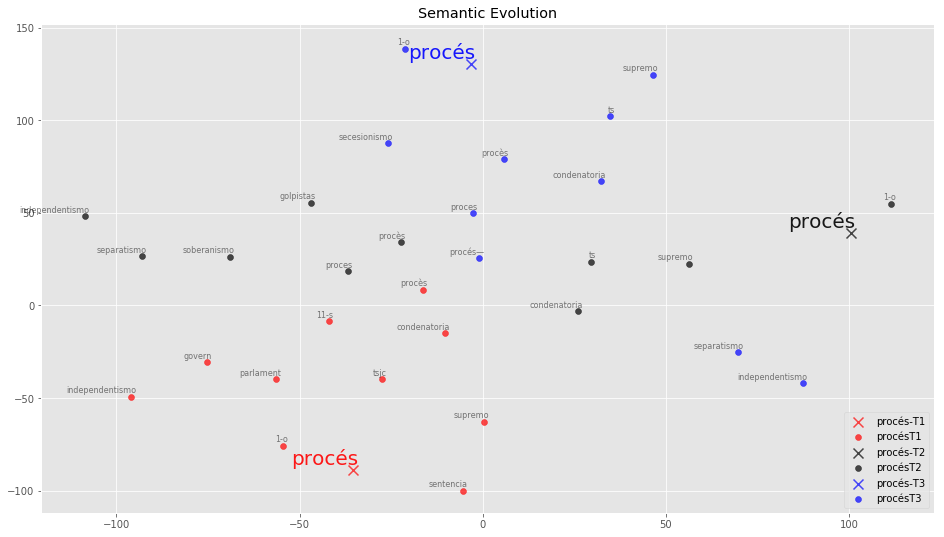

In [73]:
plot_tsne('Semantic Evolution', 3*['procés'], embeddings_en_2d, word_clusters, ['T1', 'T2', 'T3'])